In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("Housing.csv")


le = LabelEncoder()
df['mainroad'] = le.fit_transform(df['mainroad'])
df['guestroom'] = le.fit_transform(df['guestroom'])
df['basement'] = le.fit_transform(df['basement'])
df['hotwaterheating'] = le.fit_transform(df['hotwaterheating'])
df['airconditioning'] = le.fit_transform(df['airconditioning'])
df['prefarea'] = le.fit_transform(df['prefarea'])
df['furnishingstatus'] = le.fit_transform(df['furnishingstatus'])

#Separating the regressor and and the response
X=df.iloc[:,1:]
y=df.iloc[:,0]

#Splitting the data into training and testing set
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size = 0.3, random_state=0)



reg= LinearRegression()
reg.fit(Xtrain, ytrain)

ytrainpredict=reg.predict(Xtrain)
mse= mean_squared_error(ytrain, ytrainpredict)
r2= r2_score(ytrain, ytrainpredict)


print('Train MSE =', mse)
print('Train R2 score =', r2)
print("\n")






Train MSE = 1199246846796.9082
Train R2 score = 0.6575703217254214




In [ ]:
ytestpredict = reg.predict(Xtest)
mse= mean_squared_error(ytest, ytestpredict)
r2= r2_score(ytest, ytestpredict)

print('Test MSE =', mse)
print('Test R2 score =', r2)
print("\n")


Train MSE = 959110878780.8795
Train R2 score = 0.7235015223200351




In [ ]:
#Bias and the respecive slopes for each regressors
slope= reg.coef_
bias= reg.intercept_
print(slope, bias)


[ 2.48857876e+02  1.34994406e+05  9.50583380e+05  4.18321569e+05
  4.66890751e+05  3.68497644e+05  3.59364424e+05  1.24665331e+06
  8.97037026e+05  2.23301809e+05  6.96754525e+05 -2.30222653e+05] 107133.47334964201


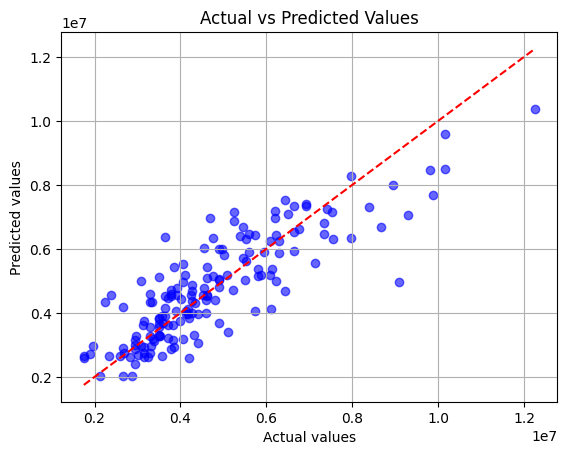

In [ ]:
#Plotting ytest and ytestpredict and comparing with the actual vs predicted line.
plt.figure()
plt.scatter(ytest, ytestpredict, color='blue', alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.grid()
plt.show()